
### 10/09/2021
# Data Science and Business Analytics (GRIP SEPTEMBER'21)
### Author: Sameer Patil
## Task 1 : Prediction using Unsupervised ML
### Problem Statement: From the Iris dataset, predict the optimum number of clusters and reperesent it visually
### Importing Required modules ----->

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Iris dataset  ------------->

In [14]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### K-Means clustering :  

In [15]:
X = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
clust = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    clust.append(kmeans.inertia_)

C:\Users\SAMEER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Elbow method visualization :  Within cluster sum of squares vs Number of clusters

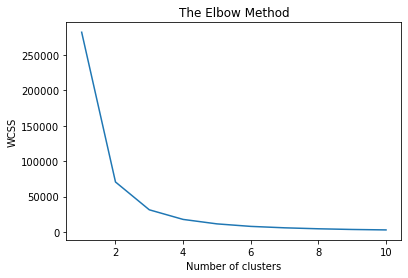

In [7]:
plt.plot(range(1,11),clust)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [8]:
k_means = KMeans(n_clusters=3, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
pred_kmeans = k_means.fit_predict(X)

## Data Visualisation by mapping the centroids for the K-clusters

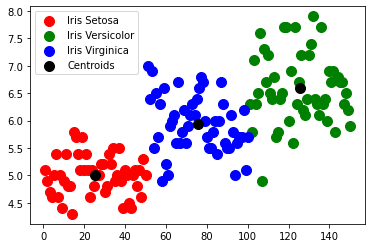

In [9]:
plt.scatter(X[pred_kmeans == 0, 0], X[pred_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris Setosa')
plt.scatter(X[pred_kmeans == 1, 0], X[pred_kmeans == 1, 1], s = 100, c = 'green', label = 'Iris Versicolor')
plt.scatter(X[pred_kmeans == 2, 0], X[pred_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris Virginica')

# Plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s =100, c = 'black', label = 'Centroids')
plt.legend()